### With PySpark

In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tree_models').getOrCreate()

In [2]:
data = spark.read.csv("C:\\Users\\DHRUBAJIT\\Desktop\\Kaggle Datasets\\creditcard.csv", inferSchema=True, header=True)
data.printSchema()

root
 |-- Time: decimal(10,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double

In [3]:
data.show()

+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|                V3|                 V4|                 V5|                 V6|                  V7|                 V8|                V9|                V10|               V11|               V12|                V13|                V14|                V15|                V16|                 V17|                V18|                V19|                V20|                 V

In [4]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',], outputCol='Features')

In [5]:
#transforming the data into vector....
output = assembler.transform(data)

#converting the categorical target variable "Private" into numeric....
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol='Amount',outputCol='Target')
new_df = indexer.fit(output).transform(output)

#final predictors and target variable....
final_data = new_df.select(['Features','Target'])
final_data.show()

+--------------------+-------+
|            Features| Target|
+--------------------+-------+
|[-1.3598071336738...|11917.0|
|[1.19185711131486...|   17.0|
|[-1.3583540615982...|17846.0|
|[-0.9662717115720...| 2604.0|
|[-1.1582330934952...|   69.0|
|[-0.4259658844124...|  830.0|
|[1.22965763450793...|   20.0|
|[-0.6442694423481...| 1270.0|
|[-0.8942860822028...| 5887.0|
|[-0.3382617524257...|  842.0|
|[1.44904378114715...|  437.0|
|[0.38497821518095...|    3.0|
|[1.249998742053,-...| 3567.0|
|[1.0693735878819,...|  501.0|
|[-2.7918547659339...| 2058.0|
|[-0.7524170429566...|   97.0|
|[1.10321543528383...|   25.0|
|[-0.4369050713606...|    2.0|
|[-5.4012576631582...| 1279.0|
|[1.4929359769862,...|   15.0|
+--------------------+-------+
only showing top 20 rows



In [14]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [7]:
rf_model = RandomForestRegressor(labelCol='Target', featuresCol='Features')

import time  
t0=time.time()
rff_model = rf_model.fit(final_data)
end_time = time.time() - t0
print("Time taken: %.2f " %(end_time))

Time taken: 13.70 


### With Scikit-Learn

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\Kaggle Datasets\\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.drop(['Time','Class'],axis=1, inplace=True)

In [11]:
X = data.drop(['Amount'], axis=1)
y = data['Amount']

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

t1 = time.time()
rf.fit(X,y)
end_time1 = time.time() - t1
print("Time taken: %.2f " %(end_time1))

Time taken: 372.32 


In [26]:
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

In [28]:
time_df = pd.DataFrame([13.7,272.3], index=['Spark','Scikit-Learn'])

In [29]:
time_df

,0
Spark,13.7
Scikit-Learn,272.3


### Comparison

Number of rows: 2,84,808
Number of cols: 28


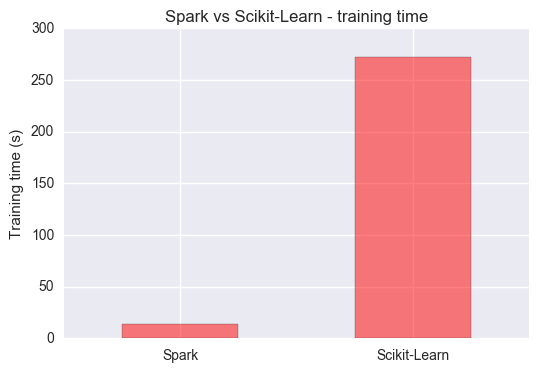

In [33]:
print("Number of rows: 2,84,808")
print("Number of cols: 28")

time_df.plot(kind='bar', rot=0, alpha=0.5, color='red')
plt.title("Spark vs Scikit-Learn - training time")
plt.ylabel("Training time (s)")
plt.legend("")